In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#!pip install missingno


In [2]:
# load data from CSV
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
data.shape

(1000, 8)

In [6]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [7]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<AxesSubplot:>

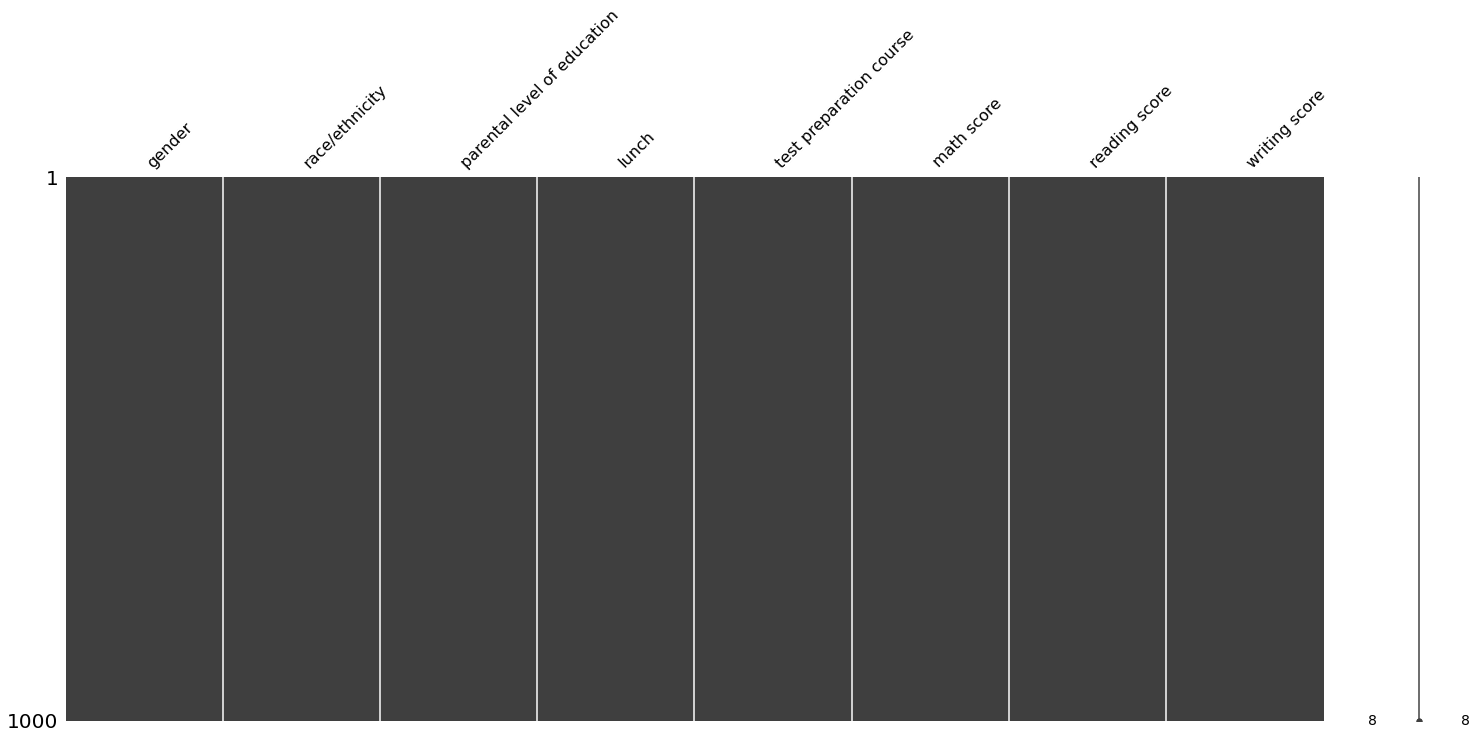

In [9]:
# Visualize missing data
msno.matrix(data)

In [10]:
#give count of missing values in each column
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#initializing the passmarks
passmark=41

Let's create three new columns: Total_Marks, Percentage and grade


In [12]:
data['Percentage'] = (data['math score']+data['reading score']+data['writing score'])/3

Percentage Range Grade Qualification

         = 71 A Excellent = 61 B Very Good = 51 C Good = 41 D Pass < 41 F Fail

In [13]:
def Grade(Percentage):
    if (Percentage >= 71):return 'A'
    if (Percentage >= 61):return 'B'
    if (Percentage >= 51):return 'C'
    if (Percentage >= 41):return 'D'
    else: return 'F'
    
data["grade"] = data.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [14]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,A


In [15]:
data.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [16]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none   

In [17]:
sns.set(style='whitegrid')

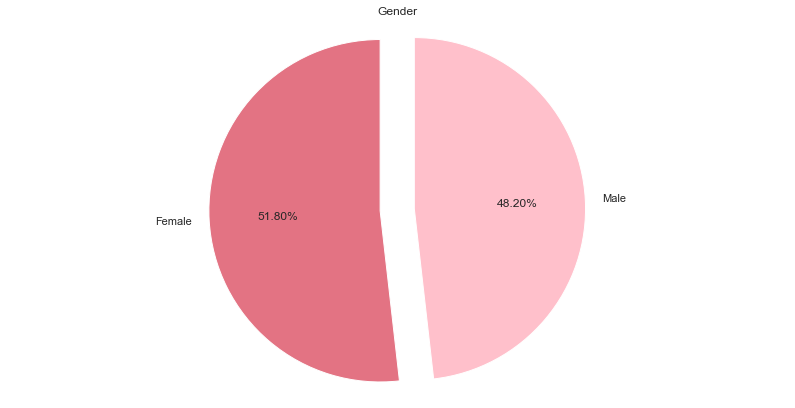

In [18]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(data['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

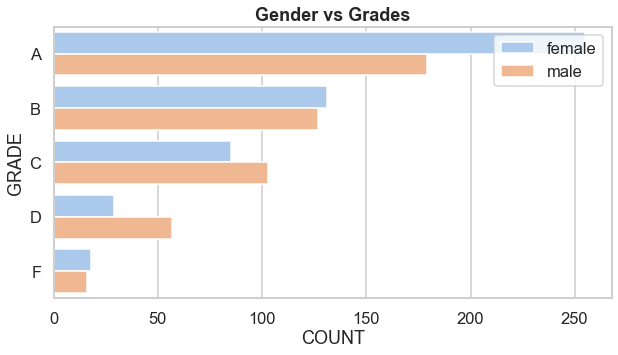

In [19]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=data, order=["A","B","C","D","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

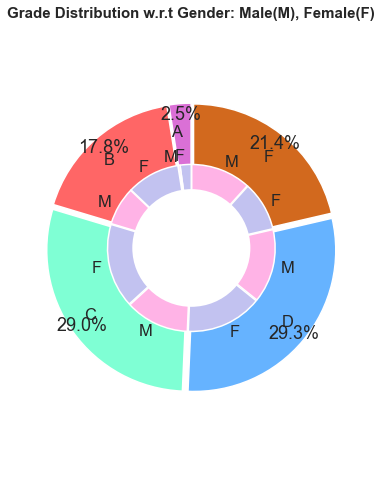

In [20]:
plt.figure(figsize=(5, 7))
labels =["A","B","C","D","F"]
values = [22,157,255,258,188]
labels_gender = ["F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)

#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold')

# Adjust layout to reduce spacing between plot and title
plt.subplots_adjust(top=0.9)

# show plot 
plt.axis('equal')
plt.tight_layout()
plt.show()

From the above visualization we infer:

The majority of students who earned an O grade were female. Majority of students received B grade followed by C. More female students received A and B Grade relative to male students. More number of boys received D and E grade. Almost similar number of both, male and female, got F grade.

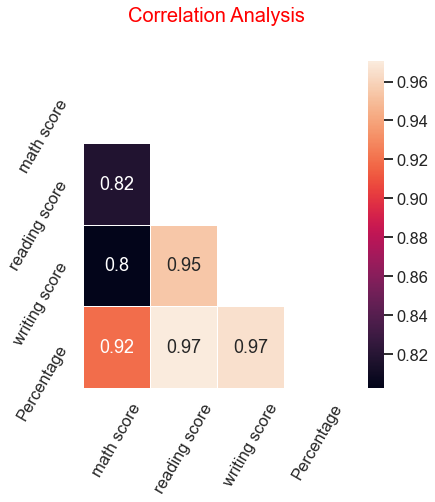

In [21]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'object']
corr = data[numerical_columns].corr()

plt.figure(figsize=(6, 6))
plt.title('Correlation Analysis', color='Red', fontsize=20, pad=40)

mask = np.triu(np.ones_like(corr, dtype=bool))  # Create a mask for upper triangle
sns.heatmap(corr, mask=mask, annot=True, linewidths=.5)  # Plot heatmap with annotations
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,A


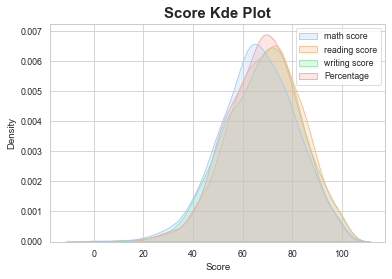

In [23]:
sns.set_context("paper",font_scale=1)
sns.kdeplot(data=data,shade = True)
plt.xlabel('Score')
plt.title('Score Kde Plot', fontsize=15, fontweight='bold')
plt.show()

<Figure size 360x360 with 0 Axes>

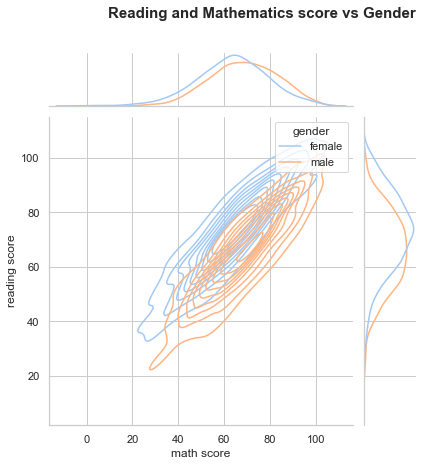

In [24]:
plt.figure(figsize=(5, 5))
sns.set_context("notebook")
sns.jointplot(data=data, x="math score", y="reading score", hue="gender", kind="kde")
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

<Figure size 288x360 with 0 Axes>

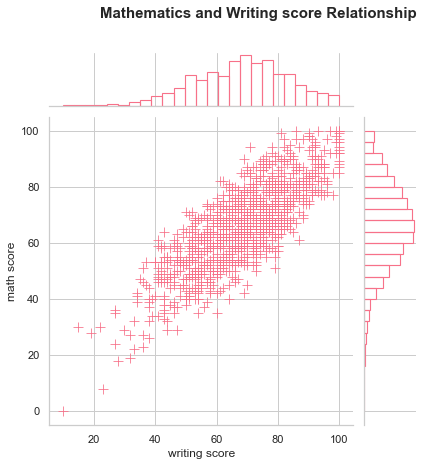

In [25]:
plt.figure(figsize=(4, 5))
sns.set_palette("husl", 9)
sns.jointplot(
    data=data, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

<Figure size 288x360 with 0 Axes>

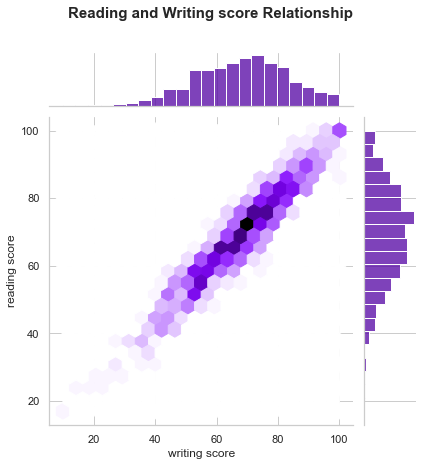

In [26]:
plt.figure(figsize=(4, 5))
sns.set_palette("plasma")
sns.jointplot(data=data, x="writing score", y="reading score", kind="hex")
plt.title('Reading and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

<Figure size 288x360 with 0 Axes>

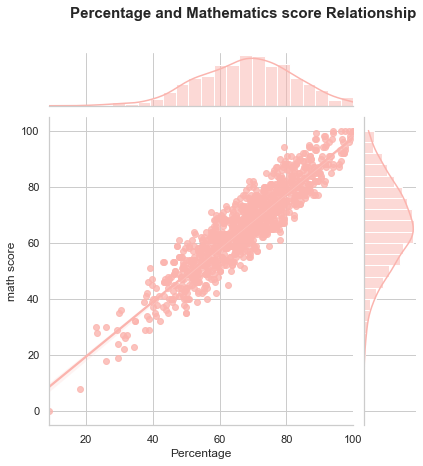

In [27]:
plt.figure(figsize=(4, 5))
sns.set_palette("Pastel1")
sns.jointplot(data=data, x="Percentage", y="math score", kind="reg")
plt.title('Percentage and Mathematics score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

<Figure size 288x360 with 0 Axes>

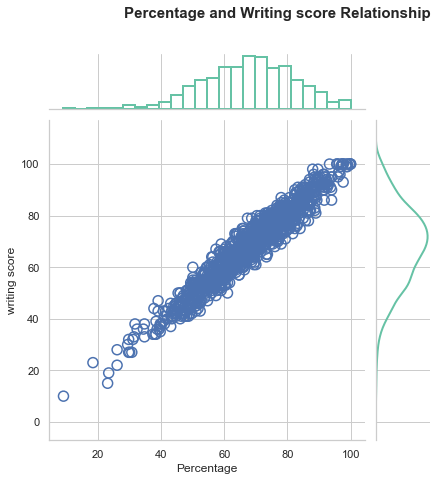

In [28]:
plt.figure(figsize=(4, 5))
sns.set_palette("Set2")
g = sns.JointGrid()
x, y = data["Percentage"], data["writing score"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

<Figure size 144x216 with 0 Axes>

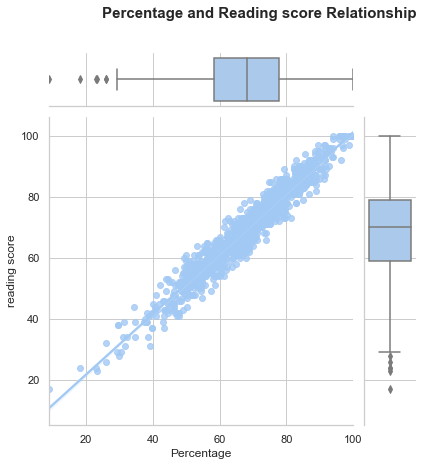

In [29]:
plt.figure(figsize=(2, 3))
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=data, x="Percentage", y="reading score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

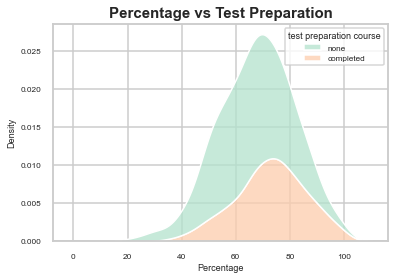

In [30]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=data, x="Percentage", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

plt.show()

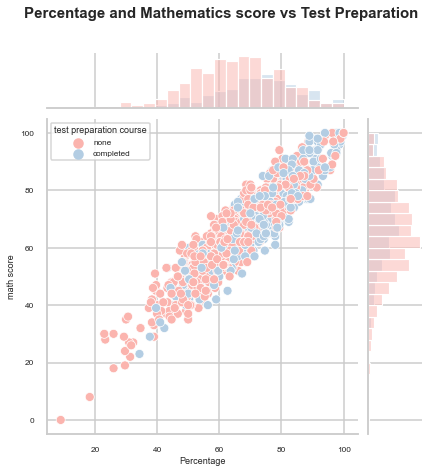

In [31]:
sns.set_palette("Pastel1")
g = sns.JointGrid(data=data, x="Percentage", y="math score", hue="test preparation course")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

From the above visualization we can infer that :

Students who have completed their test preparations have definitely scored better. While a few students who did not complete their test preparations have not performed so well.

We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.

Also, there are very few who completed their test preparation but still scored low percentage.

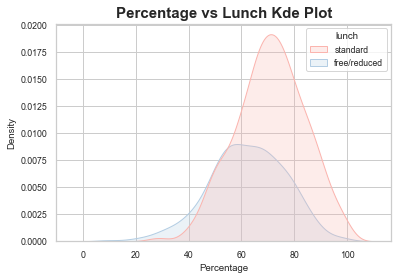

In [32]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=data, x="Percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

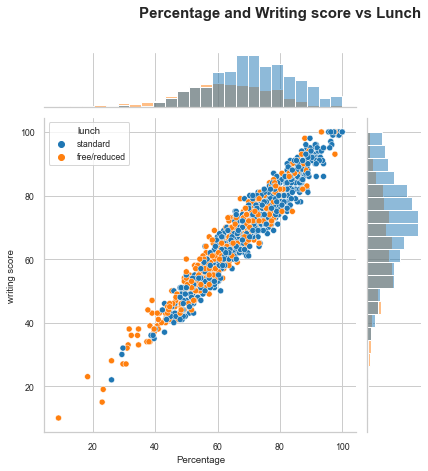

In [33]:
sns.set_palette("tab10")
g = sns.JointGrid(data=data, x="Percentage", y="writing score", hue="lunch")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Writing score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Notice the range 75 to 100 in the above visualization.

Students who had the standard lunch have performed very well. Students who had the free/reduced lunch have not performed so well. It is very evident that food and nutriention play a vital role in the growth of a student both, physically and academically. Nutrition plays a key role in the healthy development of the children. Nutritious foods provide the body and mind with the energy needed to grow, feel well, be active, stay healthy and learn. Students are able to learn better when they're well nourished, and eating healthy meals has been linked to higher grades, better memory and alertness, and faster information processing.

Healthy students are better learners.

In [34]:
data[(data['race/ethnicity']=='group B')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,A
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
...,...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,A
976,male,group B,some college,free/reduced,completed,60,62,60,60.666667,C
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,F
982,male,group B,some high school,standard,completed,79,85,86,83.333333,A


In [35]:
grade_counts = data["grade"].value_counts().sort_index()

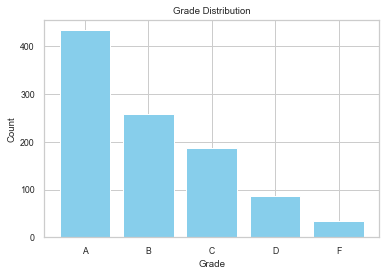

In [36]:
# Plot histogram
plt.bar(grade_counts.index, grade_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

# Show plot
plt.show()

In [37]:
data["grade"].index.sort_values()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [38]:
data[data['grade']=='F'].groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
gender,,,,,,,,,
female,18,18,18,18,18,18,18,18,18
male,16,16,16,16,16,16,16,16,16


In [39]:
data["race/ethnicity"].value_counts().sort_index()

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

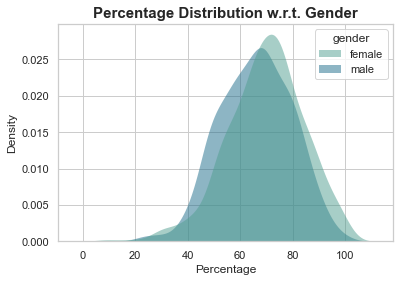

In [40]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=data, x="Percentage", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Percentage Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

In [41]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'grade'],
      dtype='object')

sns.set_palette("Dark2")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=data, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

In [43]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'grade'],
      dtype='object')

Students whose parents hold a master's degree have a higher overall percentage. Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.

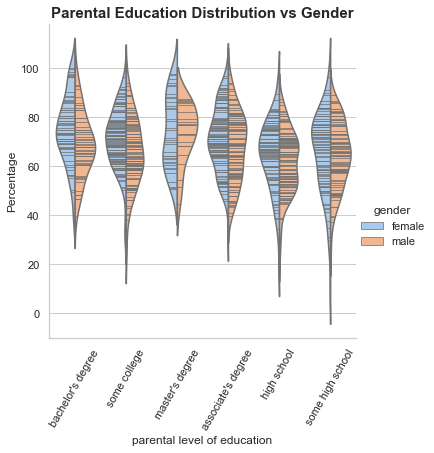

In [44]:
sns.catplot(x="parental level of education", y="Percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

Females whose parents hold a Bachelor's degree, followed by master's degree,are more successful. Males whose parents hold a Bachelor's degree and master's degree have similar academic performance

In [49]:
# # Define numerical and categorical columns based on your information
# numerical_columns = ['math score', 'reading score', 'writing score', 'Percentage']
# categorical_columns = [
#     'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
# ]

# # 1. Encode categorical features (choose one option):

# # **Option 1: Direct encoding with fit_transform (recommended)**
# encoded_categoricals = onehot_encoder.fit_transform(data[categorical_columns])

# # **Option 2: Label encoding if needed (modify accordingly)**
# # label_encoder = LabelEncoder()
# # encoded_categoricals = label_encoder.fit_transform(data[categorical_columns])

# # 2. Combine numerical and encoded features:

# # Option 1: Concatenate DataFrames
# X = pd.concat([data[numerical_columns], pd.DataFrame(encoded_categoricals)], axis=1)

# # Option 2: Use DataFrame constructor (more concise)
# # X = pd.DataFrame({
# #     **numerical_columns:** data[numerical_columns],
# #     **encoded_categorical_column_names:** encoded_categoricals
# # })

# # 3. Extract target variable
# y = data['grade']


# Define numerical and categorical columns based on your information
numerical_columns = ['math score', 'reading score', 'writing score', 'Percentage']
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Encode categorical features
onehot_encoder = OneHotEncoder()
encoded_categoricals = onehot_encoder.fit_transform(data[categorical_columns])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_columns])

# Convert encoded_categoricals to dense array
encoded_categoricals_dense = encoded_categoricals.toarray()

# Concatenate the standardized numerical features with the encoded categorical features
X_scaled_encoded = np.concatenate([X_scaled, encoded_categoricals_dense], axis=1)

# Extract target variable
y = data['grade']

# One-hot encode target variable
y_encoded = pd.get_dummies(y)

print('Data preparation completed!')

Data preparation completed!


In [47]:
print(X.shape) 

(1000, 17)


In [50]:
print(encoded_categoricals.shape)

(1000, 17)


In [51]:
print(y.shape)

(1000,)


In [ ]:
# # Split data into training, validation, and testing sets

# ss = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
# for train_index, test_index in ss.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
# #  Consider scaling numerical features if needed
# # scaler_numerical = MinMaxScaler()  # Or StandardScaler for non-negative features
# # X_train_scaled = scaler_numerical.fit_transform(X_train[numerical_columns])
# # ... (apply scaling to other sets)

# print('Data preparation completed!')

In [52]:
# Split the scaled and encoded feature matrix into training and testing sets
X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = train_test_split(X_scaled_encoded, y_encoded, test_size=0.3, random_state=42)

# Define and train the model with the scaled and encoded feature matrix
model_scaled = Sequential()
model_scaled.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_scaled.add(Dense(32, activation='relu'))
model_scaled.add(Dense(5, activation='softmax'))  # 5 classes (A, B, C, E, F)
model_scaled.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_scaled.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set with scaled and encoded features
loss_scaled, accuracy_scaled = model_scaled.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Loss with Scaled and Encoded Features: {loss_scaled}, Test Accuracy with Scaled and Encoded Features: {accuracy_scaled}")

Epoch 1/20
10/10 [==============================] - 3s 72ms/step - loss: 1.5333 - accuracy: 0.3222 - val_loss: 1.2888 - val_accuracy: 0.5286
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 1.2142 - accuracy: 0.5429 - val_loss: 1.0519 - val_accuracy: 0.4857
Epoch 3/20
10/10 [==============================] - 0s 17ms/step - loss: 0.9981 - accuracy: 0.5937 - val_loss: 0.9076 - val_accuracy: 0.5286
Epoch 4/20
10/10 [==============================] - 0s 16ms/step - loss: 0.8592 - accuracy: 0.6429 - val_loss: 0.8007 - val_accuracy: 0.5714
Epoch 5/20
10/10 [==============================] - 0s 15ms/step - loss: 0.7520 - accuracy: 0.7365 - val_loss: 0.6969 - val_accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6634 - accuracy: 0.7952 - val_loss: 0.6077 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 0s 15ms/step - loss: 0.5869 - accuracy: 0.8333 - val_loss: 0.5349 - val_accuracy: 0.8429
Epoch 8/20
10

In [53]:
from sklearn.metrics import classification_report

# Use the trained model to make predictions on the test set
y_pred = model_scaled.predict(X_test_scaled)

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(np.array(y_test_encoded), axis=1)

# Generate and print the classification report
classification_rep = classification_report(y_true_labels, y_pred_labels)
print("Classification Report:\n", classification_rep)

10/10 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       126
           1       0.97      0.97      0.97        74
           2       0.83      1.00      0.90        52
           3       0.58      0.71      0.64        31
           4       1.00      0.06      0.11        17

    accuracy                           0.90       300
   macro avg       0.88      0.75      0.72       300
weighted avg       0.92      0.90      0.89       300



In [54]:
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
y_pred = model_scaled.predict(X_test_scaled)

# Convert one-hot encoded predictions and true labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded.values, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

10/10 [==============================] - 0s 3ms/step
Confusion Matrix:
[[124   2   0   0   0]
 [  0  72   2   0   0]
 [  0   0  52   0   0]
 [  0   0   9  22   0]
 [  0   0   0  16   1]]


In [55]:
# Create new data (example)
new_data = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group C'],
    'parental level of education': ["associate's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'math score': [85],
    'reading score': [90],
    'writing score': [88],
    'Percentage': [87.666667]
})

# Encode categorical features
encoded_categoricals_new = onehot_encoder.transform(new_data[categorical_columns])

# Standardize numerical features
X_scaled_new = scaler.transform(new_data[numerical_columns])

# Convert encoded_categoricals to dense array
encoded_categoricals_dense_new = encoded_categoricals_new.toarray()

# Concatenate the standardized numerical features with the encoded categorical features
X_scaled_encoded_new = np.concatenate([X_scaled_new, encoded_categoricals_dense_new], axis=1)

# Obtain predictions for the new data
predicted_grades_new = model_scaled.predict(X_scaled_encoded_new)

# Print the predicted grades for the new data
print(predicted_grades_new)

1/1 [==============================] - 0s 41ms/step
[[9.9999797e-01 2.0786183e-06 4.4452397e-09 5.3598220e-10 2.6658377e-11]]


In [56]:
# Get the index of the class with the highest probability
predicted_grade_index = np.argmax(predicted_grades_new)

# Define a list of grade labels
grade_labels = ['A', 'B', 'C', 'D', 'F']

# Get the predicted grade label
predicted_grade = grade_labels[predicted_grade_index]

# Print the predicted grade
print("Predicted Grade:", predicted_grade)

Predicted Grade: A
